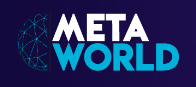

# Decorators


Decorators can be thought of as functions which modify the *functionality* of another function. They help to make your code shorter and more "Pythonic". 

To properly explain decorators we will slowly build up from functions. Make sure to run every cell in this Notebook for this lecture to look the same on your own computer.<br><br>So let's break down the steps:

## What are Decorators

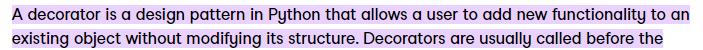

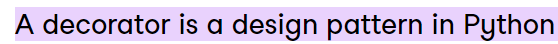

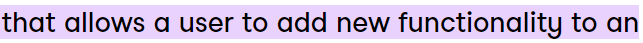

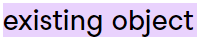

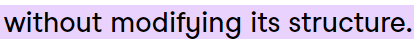

Let's discuss what that word decorator actually means in this context.

Imagine that you created a function here.

We're representing it by just a simple function.

It does some simple stuff and then returns something.

In [ ]:
def simple_func() :
    # Do simple stuff 
    # return something
    
    

So you create this simple function and now you want to add some more functionality to it, or in other words, add more code.

In [ ]:
def simple_func() :
    # Want to do more stuff!
    # Do simple staff
    # return something

What you could do is take your original simple function, then add some more stuff to it, keep doing the old stuff and then return something. But this idea of adding new functionality basically represents a problem because you have two options here.

1. Either you can add the extra code otherwise known as adding functionality to your old function, but then you have a problem of not being able to call your original function. You've edited it in some way with that new functionality.

2. The other option is to create a brand new function where you copied all the old code and then add a new code to that. The problem with that, though, is now you had to recreate the entire function over again. Even though it's just a copy and paste, it's not ideal that you had to actually make another function.

- But what if you actually then wanted to remove that extra functionality at a later date?

- We would have to do is delete that function or make sure you don't call it.

- So deleting it manually, making sure you don't have the old function.

- There's got to be a better way.

__- So what would be nice is if you had an on off switch where you could quickly add that new code or add the new functionality and then turn it back off again. This is where the decorator comes into play.__

__- Python has this concept called decorators that allow you to quickly tack on extra functionality to an already existing function.__
__- They use @ operator and are then placed on top of the original function.__

So you just take your original simple function and then you have some decorator which connects to some extra code, and then you can add in extra functionality. Then if you don't want that extra functionality, you just delete that at some decorator line on top of the function.

In [ ]:
# Now, you can easily add on or turn off extra functionality with a decorator.

@some_decorator
def simple_func() :
    # Do simple stuff
    # return something

__- So what we're going to do is we're going to go through the steps of manually building out a decorator ourselves to show what the operator is actually doing behind the scenes.__

__- And we're also going to learn about some concepts such as passing a function within another function.__

__- We're going to go step by step and build this out very slowly.__

So let's open up a Jupyter Notebook and get started.

In [2]:
def func():
    return 1

In [3]:
func()

1

In [4]:
func

<function __main__.func()>

In [13]:
def merhaba():
    return "Merhaba!"

In [14]:
merhaba()

'Merhaba!'

In [15]:
merhaba

<function __main__.merhaba()>

we can actually assign functions to other variables and then execute them off that variable. So let me show you what I mean by that.

Assign another label to the function. Note that we are not using parentheses here because we are not calling the function **merhaba**, instead we are just passing a function object to the **selam** variable.

In [17]:
selam = merhaba

In [18]:
selam()

'Merhaba!'

In [19]:
del merhaba

In [20]:
merhaba()

NameError: name 'merhaba' is not defined

In [21]:
selam()

'Merhaba!'

And it's important to know that functions are objects that can be passed into other objects.So now let's show an example of passing in a function within another function or calling functions within another function.

In [22]:
def merhaba(name="Fatih") :
    print("The merhaba() function has been executed")

In [23]:
merhaba()

The merhaba() function has been executed


Now let's define a function inside of this function.

In [28]:
def merhaba(name="Fatih") :
    print("The merhaba() function has been executed")
    
    def selam() :
        return "\t This is the selam() function inside merhaba!"
    
    print(selam())
        

In [29]:
merhaba()

The merhaba() function has been executed
	 This is the selam() function inside merhaba!


## Functions within functions
Great! So we've seen how we can treat functions as objects, now let's see how we can define functions inside of other functions:

In [33]:
def merhaba(name="Fatih") :
    print("The merhaba() function has been executed")
    
    def selam() :
        return "\t This is the selam() function inside merhaba!"
    
    def hoşgeldin() :
        return "\t\t This is hoşgeldin inside merhaba!"
    
    print(selam())
    print(hoşgeldin())
    print("This is the end of merhaba function")

In [34]:
merhaba()

The merhaba() function has been executed
	 This is the selam() function inside merhaba!
		 This is hoşgeldin inside merhaba!
This is the end of merhaba function


__Now something to notice here is that selam is defined inside of the merhaba function and welcomes the find inside of the merhaba function.__

__That means their scope is limited to the merhaba function.__

In [35]:
hoşgeldin()

NameError: name 'hoşgeldin' is not defined

__But what if we want to access these functions outside of merhaba?__

__What we could do is have the merhaba function actually return a function.__

Note how due to scope, the welcome() function is not defined outside of the hello() function. Now lets learn about returning functions from within functions:
## Returning Functions

In [36]:
def merhaba(name="Fatih") :
    print("The merhaba() function has been executed")
    
    def selam() :
        return "\t This is the selam() function inside merhaba!"
    
    def hoşgeldin() :
        return "\t\t This is hoşgeldin inside merhaba!"
    
    print("I am going to return a function!!")
    
    if name == "Fatih" :
        return selam
    else :
        return hoşgeldin

In [40]:
my_new_func = merhaba("Fatih")

The merhaba() function has been executed
I am going to return a function!!


In [41]:
print(my_new_func())

	 This is the selam() function inside merhaba!


__So this is the idea of being able to return a function within another function.__

Let's see one last very simple example.

In [44]:
def cool() :
    
    def super_cool() :
        return "I am very cool!"
    
    return super_cool
        

In [45]:
some_func = cool()

In [46]:
some_func

<function __main__.cool.<locals>.super_cool()>

In [47]:
some_func()

'I am very cool!'

__So this is just a simple idea of having a function, defining a function inside of that function and then returning that function. And we're going to use this as our idea of building out a decorator.__

## Functions as Arguments
Now let's see how we can pass functions as arguments into other functions:

In [48]:
# passing a function as an argument

def merhaba() :
    return "Merhaba Fatih!"

In [50]:
def other(some_def_func) :
    print("Other code runs here!")
    print(some_def_func())

In [51]:
merhaba

<function __main__.merhaba()>

In [52]:
merhaba()

'Merhaba Fatih!'

In [53]:
other(merhaba)

Other code runs here!
Merhaba Fatih!


## Creating a Decorator
In the previous example we actually manually created a Decorator. Here we will modify it to make its use case clear:

__So now we understand that we can return functions and we can have functions arguments with those two main tools.__

__We're actually going to now be able to create a decorator.__

In [73]:
def new_decorator(original_func) :
    
    def wrap_func() :
        
        print("Some extra code, before the original function")
        
        original_func()
        
        print("Some extra code, after the original function")
        
    return wrap_func

__The wrap function.__

You can kind of think about this __as the idea of a present with some wrapping paper.__

__The actual original function is the present, and then we're going to essentially put it inside a box and wrap around it, which is why this is called decoration.__

__So you're kind of decorating this function with some wrapping paper.__

__The way the wrapping paper is, is the extra code that can go on top of the function before or after the function below it.__

This is a function just like we did before of hello and greet.

Except now the names reflect what's actually happening here.
We created some new decorative function.

It takes in an original function and inside of this we define this wrapper which has some extra code before it executes that original function, puts in some extra code after it, and then returns the wrap function.

In [74]:
def func_needs_decorator() :
    print("I want to be decorated!!")

In [75]:
func_needs_decorator()

I want to be decorated!!


In [76]:
decorated_func = new_decorator(func_needs_decorator)

In [77]:
decorated_func()

Some extra code, before the original function
I want to be decorated!!
Some extra code, after the original function


Now what we did is actually quite complicated because I had to define all this stuff here, but there's a special syntax for what is essentially this line.

And the special syntax is that @ operator.

So if I wanted to actually create a new decorator, what I could do is say @ new decorator.

In [78]:
@new_decorator
def func_needs_decorator() :
    print("I want to be decorated!!")

In [79]:
func_needs_decorator()

Some extra code, before the original function
I want to be decorated!!
Some extra code, after the original function


__When you put decorator on top of a function with an @ , it just says,__ 

__- okay, I'm going to pass this function into this as the original function.__

__- I'm going to do something to it, add some extra code before,__

__- Call the original function.__

__- Add some extra code after.__

__- Wrap that into a nice function and then return that wrapped version.__

That's all the decorator is doing here.

It's essentially wrapping it around.

Then if you ever want to turn this off, well, it's easy.

In [ ]:
# @new_decorator
def func_needs_decorator() :
    print("I want to be decorated!!")

---

__Realistically, you really won't be having to do this sort of coding of a new decorator or the wrapping function, etc.You won't have to worry about that.__

__you will be doing is you're going to be using a web framework or someone else's library and just adding in these new decorators to maybe render a new website or point to another page.__

__So they're really commonly used in web frameworks such as Django or Flask, which is why it's important to understand behind the scenes what the decorator is actually doing.__

**Great! You've now built a Decorator manually and then saw how we can use the @ symbol in Python to automate this and clean our code. You'll run into Decorators a lot if you begin using Python for Web Development, such as Flask or Django!**

## Some Challenges

### Challenge_1

#### Step-1

__Create a function which is called smart_div that includes inner
function/functions always gives the result bigger number divides smaller number.__

In [96]:
def div(a, b) :
    return a / b

In [97]:
div(8, 4)

2.0

In [98]:
div(4, 8)

0.5

In [99]:
def smart_div(func):
    
# Your code here

    def inner(a, b) :
    
        if a < b :
            return b / a
        
        return func(a, b)
    
    return inner
        

In [100]:
new_div = smart_div(div)

In [101]:
new_div(2, 4)

2.0

#### Step-2

__Apply the process above with python decorators__

In [102]:
@smart_div
def div(a, b) :
    return a / b

In [103]:
div(2, 16)

8.0

### Challenge_2

In [104]:
def arithmetic_operations(func):
    
    def operators(a, b):
        
        func(a, b)
        print("The product is :", a * b)
        print("The division is :", a / b)
        print("The remainder is :", a % b)
        
    return operators
         
print("This is a decorated function.")

This is a decorated function.


In [106]:
# @arithmetic_operations
def add_and_subtract(a, b):
    print("The addition is :", a + b)
    print("The subtraction is :", a - b)

add_and_subtract(8, 4)

The addition is : 12
The subtraction is : 4


In [107]:
@arithmetic_operations
def add_and_subtract(a, b):
    print("The addition is :", a + b)
    print("The subtraction is :", a - b)

add_and_subtract(8, 4)

The addition is : 12
The subtraction is : 4
The product is : 32
The division is : 2.0
The remainder is : 0


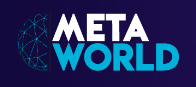